# ML Dataset stats

I want to perform some verification on the ml dataset I generated.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dask.distributed
import logging
import pathlib
import xarray as xr
import torch
import torch.distributions
import seaborn as sns

from crims2s.dask import create_dask_cluster
from crims2s.util import add_biweekly_dim

In [ ]:
#ML_DATASET_DIR = '***BASEDIR***/mlready/2021-08-08-test/'
ML_DATASET_DIR = '***BASEDIR***/mlready/2021-08-28-test'

In [ ]:
ML_DATASET_DIR = '***BASEDIR***/mlready/2021-09-07-test-set'

In [ ]:
ML_DATASET_DIR = '***BASEDIR***/mlready/2021-09-07-cube-train/'

In [ ]:
ML_DATASET_DIR = '***BASEDIR***/mlready/2021-09-08-w-features/'

In [3]:
ML_DATASET_DIR = '***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask'

## Load dataset

In [4]:
def preprocess_one_example(dataset):
    return dataset.expand_dims('forecast_time')

In [ ]:
def preprocess_

In [5]:
dataset_files = sorted([x for x in pathlib.Path(ML_DATASET_DIR).iterdir() if '.nc' in x.name])

In [6]:
#dataset_files = [f for f in dataset_files if f.stem.endswith('0416')]

In [7]:
dataset_files[:10]

[PosixPath('***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask/train_example_20000312.nc'),
 PosixPath('***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask/train_example_20010312.nc'),
 PosixPath('***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask/train_example_20020312.nc'),
 PosixPath('***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask/train_example_20030312.nc'),
 PosixPath('***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask/train_example_20040312.nc'),
 PosixPath('***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask/train_example_20050312.nc'),
 PosixPath('***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask/train_example_20060312.nc'),
 PosixPath('***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask/train_example_20070312.nc'),
 PosixPath('***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask/train_example_20080312.nc'),
 PosixPath('***HOME***fast_scratch/s2s/mlready/2021-09-14-lean-dry-mask/train_example_20090

In [8]:
features = xr.open_mfdataset(dataset_files[:3], group='/features', concat_dim='forecast_time', preprocess=preprocess_one_example)

In [ ]:
features

In [ ]:
features.mean(dim=['realization', 'lead_time', 'forecast_time', 'latitude', 'longitude']).compute()

In [ ]:
model = xr.open_mfdataset(dataset_files[:3], group='/model', concat_dim='forecast_time', preprocess=preprocess_one_example)

In [ ]:
obs = xr.open_mfdataset(dataset_files[:3], group='/obs', concat_dim='forecast_time', preprocess=preprocess_one_example)

In [ ]:
parameters = xr.open_mfdataset(dataset_files[:3], group='/model_parameters', concat_dim='forecast_time', preprocess=preprocess_one_example)

In [12]:
dry_mask = preprocess_one_example(xr.open_dataset(dataset_files[0], group='/dry_mask'))

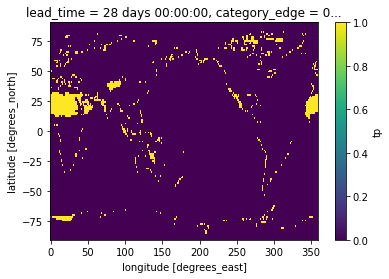

In [18]:
dry_mask.tp.astype(float).isel(lead_time=1).plot()

In [ ]:
dry_mask = xr.open_mfdataset(dataset_files[:3], group='/dry_mask', concat_dim='forecast_time', preprocess=preprocess_one_example)

In [ ]:
parameters

In [ ]:
model

In [ ]:
parameters

In [ ]:
obs.isnull().sum().compute()

In [ ]:
features

In [ ]:
obs

In [ ]:
len(obs.lead_time)

In [ ]:
46 / 7

In [ ]:
some_computed = sample.isnull().sum(dim=['latitude', 'longitude', 'realization'])

In [ ]:
some_computed.sum(dim=['variable', 'forecast_time']).compute().x.plot()

In [ ]:
some_computed.isel(lead_time=[0, 1]).sum(dim='variable').compute()

In [ ]:
sample.sel(variable='sst').isel(lead_time=slice(1, None)).sum(dim=['forecast_time', 'lead_time', 'realization']).compute().x.plot()

## Check y

In [ ]:
target = xr.open_mfdataset(dataset_files[:10], group='/terciles', concat_dim='forecast_time', preprocess=preprocess_one_example)

In [ ]:
target = target.compute()

In [ ]:
target

In [ ]:
target.isnull().isel(forecast_time=0).sum(dim=['category', 'lead_time']).t2m.plot()

# Check obs

In [ ]:
obs = xr.open_mfdataset(dataset_files[:10], group='/obs', concat_dim='forecast_time', preprocess=preprocess_one_example)

In [ ]:
obs.isnull().sum(dim=['forecast_time', 'lead_time']).t2m.plot()

In [ ]:
model_params = xr.open_mfdataset(dataset_files, group='/model_parameters', preprocess=preprocess_one_example)

In [ ]:
model_params

# Check parameters fit

## For T2M

In [ ]:
model_biweekly = add_biweekly_dim(model, weeks_12=False)

In [ ]:
model_biweekly

In [ ]:
reworked_t2m = model_biweekly.isel(lead_time=slice(1, None)).t2m.squeeze().transpose('realization', 'lead_time', 'forecast_time', ...)

In [ ]:
reworked_t2m

In [ ]:
t2m_data = torch.tensor(reworked_t2m.data.compute())

In [ ]:
t2m_mu = torch.tensor(parameters.t2m_mu.squeeze().data.compute())
t2m_sigma = torch.tensor(parameters.t2m_sigma.squeeze().data.compute())

In [ ]:
t2m_mu.max()

In [ ]:
t2m_mu.shape

In [ ]:
t2m_data.shape

In [ ]:
distribution = torch.distributions.Normal(t2m_mu, t2m_sigma)

In [ ]:
-distribution.log_prob(t2m_data).mean()

## For TP

In [ ]:
tp_data = torch.tensor(model_biweekly.isel(lead_time=-1).tp.squeeze().transpose('realization', 'forecast_time', ...).data.compute())

In [ ]:
tp_data.shape

In [ ]:
parameters

In [ ]:
tp_mu = torch.tensor(parameters.tp_cube_root_mu.squeeze().data.compute())
tp_sigma = torch.tensor(parameters.tp_cube_root_sigma.squeeze().data.compute())

In [ ]:
tp_sigma.min()

In [ ]:
distribution = torch.distributions.Normal(tp_mu, tp_sigma + 1e-9)

In [ ]:
-distribution.log_prob(tp_data ** (1. / 3.)).mean()

In [ ]:
tp_alpha = torch.tensor(parameters.tp_alpha.squeeze().data.compute())
tp_beta = torch.tensor(parameters.tp_beta.squeeze().data.compute())

In [ ]:
distribution = torch.distributions.Gamma(tp_alpha, tp_beta)

In [ ]:
-distribution.log_prob(tp_data + 1e-9).mean()

In [ ]:
tp_data.min()

In [ ]:
tp_mu.min()

In [ ]:
sns.histplot(data=tp_data.flatten())